Exploring whether digestion method tends to bias based on hydrophobicity

In [89]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE 

In [90]:
conn = mysql.connector.connect(user='root', password='password', host='127.0.0.1', port='3306',
                               database='expression_atlas_cells')
mycursor = conn.cursor(buffered=True)

# check the connection
if conn.is_connected():
    print("connection succesfull")
else:
    print("no connection")

connection succesfull


In [91]:
#Gravy scores of AA; source: https://pubmed.ncbi.nlm.nih.gov/7108955/
GRAVY_SCORES = {
    "I": 4.5,
    "V": 4.2,
    "L": 3.8,
    "F": 2.8,
    "C": 2.5,
    "M": 1.9,
    "A": 1.8,
    "G": -0.4,
    "T": -.7,
    "W": -0.9,
    "S": -0.8,
    "Y": - 1.3,
    "P": -1.6,
    "H": -3.2,
    "E": - 3.5,
    "Q": -3.5,
    "D": -3.5,
    "N": - 3.5,
    "K": -3.9,
    "R": - 4.5
}

def calculateGravy(sequence: str):
    """Calculates Gravy-score of a given protein sequence.
    
    Calculation is based on hydrophibicity score of AA from the following paper: https://pubmed.ncbi.nlm.nih.gov/7108955/
    
    G > 0: more hydrophobic
    G < 0: more hydrophilic"""

    G_score = 0
    for AA in sequence:
        if AA not in GRAVY_SCORES.keys():
            continue
        G_score += GRAVY_SCORES[AA]

    
    return G_score/len(sequence)

,uniprot_id,sequence,GRAVY
5,A0A024RBG1,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...,-0.581768
11,A0A075B6H7,MEAPAQLLFLLLLWLPDTTREIVMTQSPPTLSLSPGERVTLSCRAS...,-0.106897
12,A0A075B6I1,MAWTPLLLLFPLLLHCTGSLSQPVLTQSSSASASLGSSVKLTCTLS...,-0.248333
13,A0A075B6I3,MALTPLLLLLLSHCTGSLSRPVLTQPPSLSASPGATARLPCTLSSD...,-0.156098
14,A0A075B6L6,MGTRLLCWAALCLLGADHTGAGVSQTPSNKVTEKGKDVELRCDPIS...,-0.290435


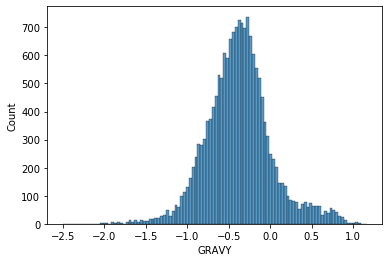

In [92]:
query = "SELECT uniprot_id, sequence FROM protein"
uniprot_seq = pd.read_sql(query, conn)
uniprot_seq = uniprot_seq[~uniprot_seq.sequence.isna()]
uniprot_seq["GRAVY"] = uniprot_seq.apply(lambda x: calculateGravy(x["sequence"]), axis = 1)
sns.histplot(uniprot_seq.GRAVY)
uniprot_seq.head()

In [93]:
uniprot_seq = uniprot_seq.filter(items = ["uniprot_id", "GRAVY"]).set_index("uniprot_id")

In [94]:
nsaf = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_creation/pooled_tsne_atlas1.csv")

In [95]:
nsaf

,assay_id,A0A024RBG1,A0A075B6X5,A0A096LP01,A0A096LP49,A0A0A6YYK6,A0A0B4J1V0,A0A0B4J2F0,A0A0J9YWL9,A0A0J9YX94,...,Q9Y6X9,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8,Q9Y6Y9,Q9Y6Z7,W5XKT8,cell_line,PXD_accession,tissue_type
0,30960,0.000010,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000040,0.000062,0.000000,0.000088,0.000000,0.0,0.0,Hep3B,PXD000533,liver
1,30961,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000042,0.000045,0.000001,0.000075,0.000000,0.0,0.0,Hep3B,PXD000533,liver
2,31008,0.000011,0.0,0.000061,0.0,0.0,0.000016,0.000000,0.000002,0.0,...,0.000024,0.000045,0.000000,0.000092,0.000024,0.0,0.0,MHCC97,PXD000533,liver
3,31009,0.000011,0.0,0.000080,0.0,0.0,0.000016,0.000000,0.000002,0.0,...,0.000035,0.000033,0.000000,0.000076,0.000024,0.0,0.0,MHCC97,PXD000533,liver
4,31056,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000350,0.000000,0.0,0.0,Jurkat,PXD004280,blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,33983,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000161,0.000143,0.000000,0.000441,0.000000,0.0,0.0,SKOV3,PXD005940,ovary
535,33986,0.000189,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000124,0.000107,0.000000,0.000291,0.000000,0.0,0.0,M14,PXD005940,skin
536,33989,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000279,0.000024,0.000000,0.000389,0.000000,0.0,0.0,MCF7,PXD005940,breast
537,34076,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000169,0.000000,0.0,...,0.000018,0.000000,0.000000,0.000027,0.000000,0.0,0.0,CCRF-CEM,PXD005940,T-cell


In [107]:
nsaf["prot_ids"] = (nsaf != 0.0).sum(axis = 1)

In [111]:
nsaf = nsaf[~(nsaf.prot_ids < 800)]

In [113]:
def apply_gravy(row):
    column_names = nsaf.columns
    score = 0

    for i in range(1,len(column_names)-1):
        
        saf = row.values[i]
        prot = column_names[i]

        if saf != 0.0 and prot in uniprot_seq.index: 
            
            GRAVY = uniprot_seq.loc[prot].values[0] #Take GRAVY score from uniprot_seq table
            score += saf*GRAVY #Update score so there is one complete hydrophobicity score for the proteome
    
    return score

In [114]:
nsaf["GRAVY"] = nsaf.apply(lambda x: apply_gravy(x), axis = 1)

/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
nsaf

,assay_id,A0A024RBG1,A0A075B6X5,A0A096LP01,A0A096LP49,A0A0A6YYK6,A0A0B4J1V0,A0A0B4J2F0,A0A0J9YWL9,A0A0J9YX94,...,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8,Q9Y6Y9,Q9Y6Z7,W5XKT8,cell_line,PXD_accession,tissue_type,GRAVY
0,30960,0.000010,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000062,0.000000,0.000088,0.000000,0.0,0.0,Hep3B,PXD000533,liver,-0.410696
1,30961,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000045,0.000001,0.000075,0.000000,0.0,0.0,Hep3B,PXD000533,liver,-0.411793
2,31008,0.000011,0.0,0.000061,0.0,0.0,0.000016,0.000000,0.000002,0.0,...,0.000045,0.000000,0.000092,0.000024,0.0,0.0,MHCC97,PXD000533,liver,-0.407007
3,31009,0.000011,0.0,0.000080,0.0,0.0,0.000016,0.000000,0.000002,0.0,...,0.000033,0.000000,0.000076,0.000024,0.0,0.0,MHCC97,PXD000533,liver,-0.406901
4,31056,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000350,0.000000,0.0,0.0,Jurkat,PXD004280,blood,-0.473853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,33983,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000143,0.000000,0.000441,0.000000,0.0,0.0,SKOV3,PXD005940,ovary,-0.354961
535,33986,0.000189,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000107,0.000000,0.000291,0.000000,0.0,0.0,M14,PXD005940,skin,-0.393639
536,33989,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000024,0.000000,0.000389,0.000000,0.0,0.0,MCF7,PXD005940,breast,-0.388901
537,34076,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000169,0.000000,0.0,...,0.000000,0.000000,0.000027,0.000000,0.0,0.0,CCRF-CEM,PXD005940,T-cell,-0.414226


In [115]:
nsaf[nsaf.GRAVY < -.6]

,assay_id,A0A024RBG1,A0A075B6X5,A0A096LP01,A0A096LP49,A0A0A6YYK6,A0A0B4J1V0,A0A0B4J2F0,A0A0J9YWL9,A0A0J9YX94,...,Q9Y6Y1,Q9Y6Y8,Q9Y6Y9,Q9Y6Z7,W5XKT8,cell_line,PXD_accession,tissue_type,prot_ids,GRAVY
78,31162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,0.0,...,0.0,0.00000,0.0,0.0,0.0,HEK293,PXD006035,fetal kidney,1428,-0.677029
79,31163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00001,0.0,0.0,0.0,HEK293,PXD006035,fetal kidney,1193,-0.677581


In [127]:
metadata = pd.read_csv("more_meta.csv")
metadata

,assay_id,filename,cell_line,PXD_accession,tissue_type,digestion,enzyme,publication_year
0,30960,3B10-1,Hep3B,PXD000533,liver,in-solution,Lys-C/Trypsin,2014.0
1,30961,3B10-2,Hep3B,PXD000533,liver,in-solution,Lys-C/Trypsin,2014.0
2,31008,H10-1,MHCC97,PXD000533,liver,in-solution,Lys-C/Trypsin,2014.0
3,31009,H10-2,MHCC97,PXD000533,liver,in-solution,Lys-C/Trypsin,2014.0
4,31056,QEXI09098,Jurkat,PXD004280,blood,in-gel,Trypsin,2016.0
...,...,...,...,...,...,...,...,...
534,33983,00522_H04_P003812_B0H_A00_R1,SKOV3,PXD005940,ovary,in-gel,trypsin,2013.0
535,33986,00522_H07_P003813_B0H_A00_R1,M14,PXD005940,skin,in-gel,trypsin,2013.0
536,33989,00522_H10_P003814_B0H_A00_R1,MCF7,PXD005940,breast,in-gel,trypsin,2013.0
537,34076,00523_H01_P003815_B0H_A00_R1,CCRF-CEM,PXD005940,T-cell,in-gel,trypsin,2013.0


In [131]:
joined_df = pd.merge(nsaf, metadata[["assay_id", "digestion"]], on = "assay_id", how = "inner")

In [132]:
joined_df

,assay_id,A0A024RBG1,A0A075B6X5,A0A096LP01,A0A096LP49,A0A0A6YYK6,A0A0B4J1V0,A0A0B4J2F0,A0A0J9YWL9,A0A0J9YX94,...,Q9Y6Y8,Q9Y6Y9,Q9Y6Z7,W5XKT8,cell_line,PXD_accession,tissue_type,prot_ids,GRAVY,digestion
0,30960,0.000010,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000088,0.000000,0.0,0.0,Hep3B,PXD000533,liver,8132,-0.410696,in-solution
1,30961,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000075,0.000000,0.0,0.0,Hep3B,PXD000533,liver,8116,-0.411793,in-solution
2,31008,0.000011,0.0,0.000061,0.0,0.0,0.000016,0.000000,0.000002,0.0,...,0.000092,0.000024,0.0,0.0,MHCC97,PXD000533,liver,8070,-0.407007,in-solution
3,31009,0.000011,0.0,0.000080,0.0,0.0,0.000016,0.000000,0.000002,0.0,...,0.000076,0.000024,0.0,0.0,MHCC97,PXD000533,liver,8006,-0.406901,in-solution
4,31056,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000350,0.000000,0.0,0.0,Jurkat,PXD004280,blood,1325,-0.473853,in-gel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,33983,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000441,0.000000,0.0,0.0,SKOV3,PXD005940,ovary,3350,-0.354961,in-gel
474,33986,0.000189,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000291,0.000000,0.0,0.0,M14,PXD005940,skin,3772,-0.393639,in-gel
475,33989,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000389,0.000000,0.0,0.0,MCF7,PXD005940,breast,3477,-0.388901,in-gel
476,34076,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000169,0.000000,0.0,...,0.000027,0.000000,0.0,0.0,CCRF-CEM,PXD005940,T-cell,3019,-0.414226,in-gel


In [137]:
joined_df.digestion.value_counts()

in-solution    221
on-filter      120
in-gel          78
?               55
on-chip          4
Name: digestion, dtype: int64

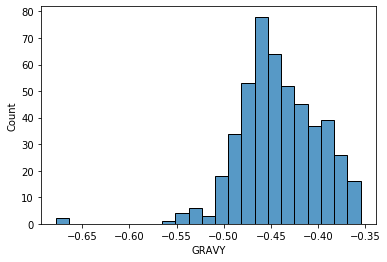

In [116]:
sns.histplot(nsaf.GRAVY)

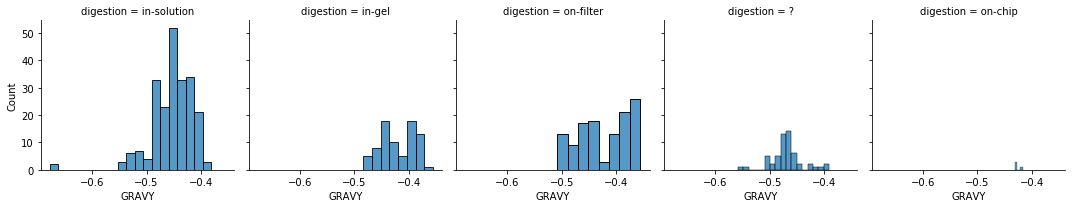

In [142]:
# Form a facetgrid using columns with a hue
sea = sns.FacetGrid(joined_df, col = "digestion")
   
# map the above form facetgrid with some attributes  
sea.map(sns.histplot, "GRAVY")
 
# adding legend
sea.add_legend()

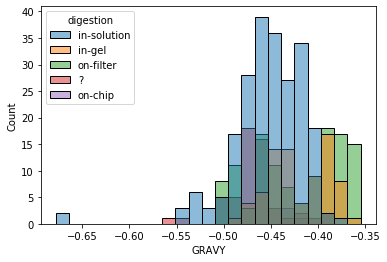

In [138]:
sns.histplot(data = joined_df, x = "GRAVY", hue = "digestion")

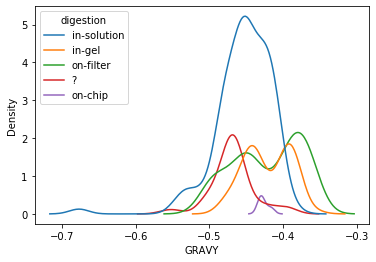

In [146]:
sns.kdeplot(data = joined_df, x = "GRAVY", hue = "digestion")

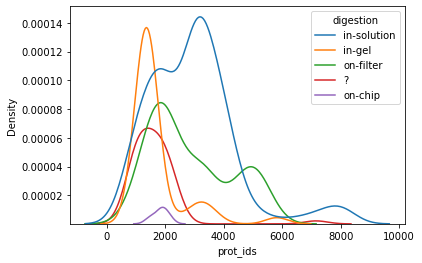

In [136]:
sns.kdeplot(data = joined_df, x = "prot_ids", hue = "digestion")

In [147]:
sol = joined_df[joined_df.digestion == "in-solution"].GRAVY
gel = joined_df[joined_df.digestion == "in-gel"].GRAVY

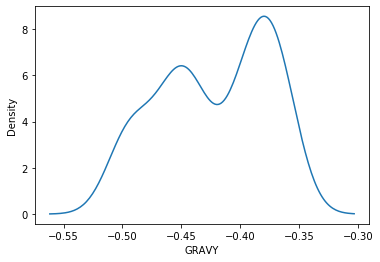

In [157]:
sns.kdeplot(joined_df[joined_df.digestion == "on-filter"].GRAVY)

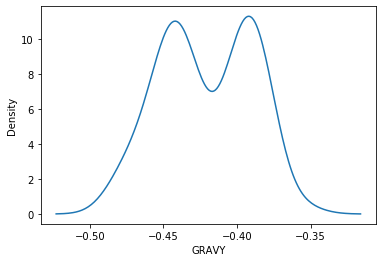

In [156]:
sns.kdeplot(gel)

/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


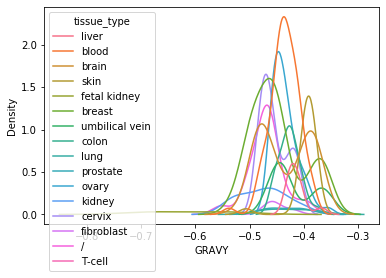

In [166]:
sns.kdeplot(data = nsaf, x = "GRAVY", hue = "tissue_type")

In [158]:
from scipy import stats
stats.ttest_ind(joined_df[joined_df.digestion == "on-filter"].GRAVY, gel)

Ttest_indResult(statistic=-0.19571690879195985, pvalue=0.845034504723881)